0.3373403234360709
0.8343474523045873


/tmp/ipykernel_34159/3016761545.py:52: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim([0, 50])
/tmp/ipykernel_34159/3016761545.py:70: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim([0, 1.4])


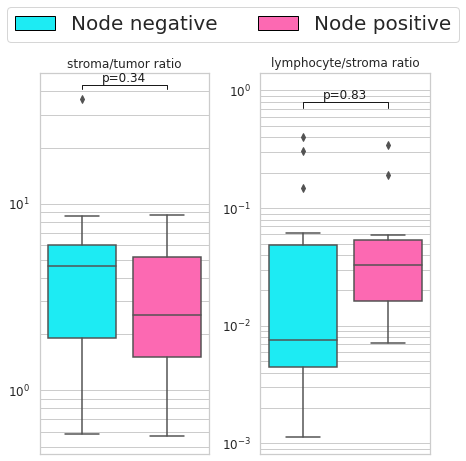

<Figure size 432x288 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec
from numpy import genfromtxt
from scipy.stats import ttest_ind
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch
import numpy as np

sns.set(style="whitegrid")

my_pal = {0: (29/256.0, 236/256.0, 244/256.0), 1: (253/256.0, 105/256.0, 179/256.0)}

plt.figure(figsize=(7,7))
plt.tight_layout()

ax1=plt.subplot(1, 2, 1)
ax2=plt.subplot(1, 2, 2)
#ax1 = fig.add_subplot(gs[0, 0])
# counts = pd.read_csv("measurements/tumor_vascular_parameters.csv", dtype={'Name': 'string'})
counts = pd.read_csv("measurements/tumor_tissue_ratios.csv", dtype={'Name': 'string'})
classes = pd.read_csv("measurements/NodeStatusAndGradeERPos.csv", dtype={'Name': 'string'})

counts['Node'] = np.nan

for index, row in classes.iterrows():
    for index2, row2 in counts.iterrows():
        if row['Name'][:-4] == row2['Name']:
            counts.loc[index2, 'Node'] = row['Node']

counts = counts.drop(counts[counts['Node'].isna()].index)
# print(classes)
# print(counts)

cat1 = counts[counts['Node']==0]['stroma_tumor_ratio']
cat2 = counts[counts['Node']==1]['stroma_tumor_ratio']
ax1 = sns.boxplot(x='Node', y='stroma_tumor_ratio', palette=my_pal, data=counts, ax=ax1, saturation=1)
ax1.set(ylabel="", xlabel="")
ax1.set(xticklabels=[])
ax1.set_title('stroma/tumor ratio')
ax1.grid(axis='y', which='minor')
t, p = ttest_ind(cat1, cat2, axis=0, nan_policy='propagate')
x1, x2 = 0, 1 
print(p)
y, h, col = counts['stroma_tumor_ratio'].max() + 5, 2, 'k'
ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
ax1.text((x1+x2)*.5, y+h, "p={:.2f}".format(p), ha='center', va='bottom', color=col)

ax1.set_yscale('log')
ax1.set_ylim([0, 50])

cat1 = counts[counts['Node']==0]['lymphocyte_stroma_ratio']
cat2 = counts[counts['Node']==1]['lymphocyte_stroma_ratio']
ax2 = sns.boxplot(x='Node', y='lymphocyte_stroma_ratio', palette=my_pal, data=counts, ax=ax2, saturation=1)
ax2.set(ylabel="", xlabel="")
ax2.set(xticklabels=[])
ax2.set_title('lymphocyte/stroma ratio')
ax2.grid(axis='y', which='minor')

t, p = ttest_ind(cat1, cat2, axis=0, nan_policy='propagate')
x1, x2 = 0, 1 
print(p)
y, h, col = counts['lymphocyte_stroma_ratio'].max() + 0.3, 0.1, 'k'
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
ax2.text((x1+x2)*.5, y+h, "p={:.2f}".format(p), ha='center', va='bottom', color=col)

ax2.set_yscale('log')
ax2.set_ylim([0, 1.4])



legend_elements = [Patch(facecolor=(29/256.0, 236/256.0, 244/256.0), edgecolor='black', label='Node negative'),
                    Patch(facecolor=(253/256.0, 105/256.0, 179/256.0), edgecolor='black', label='Node positive')]
plt.legend(handles=legend_elements, bbox_to_anchor=(-0.16,1.2), loc='upper center', ncol=2 , prop={'size': 20, 'weight':'normal'})



for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(12)
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] + ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(12)


plt.subplots_adjust(wspace=0.3)

plt.show()
plt.savefig("measurements/boxplot_stroma_lymphocyte_node.pdf", bbox_inches = 'tight')

